In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify


latexify(width_scale_factor=2, fig_height=1.75, font_size=12)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 272 kB 9.5 MB/s 
     |████████████████████████████████| 72 kB 532 kB/s 


/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [ ]:
colors = ["b", "r", "k", "g", "c", "y", "m", "r", "b", "k", "g", "c", "y", "m"]
styles = ["-", ":", "-.", "--", "-", ":", "-.", "--", "-", ":", "-.", "--", "-", ":", "-.", "--"]

In [ ]:
def gaussProb(X, mu, Sigma):
    d = 1
    X = jnp.reshape(X, newshape=(-1, d), order="F")
    X = X - mu.T
    logp = -0.5 * jnp.sum(X * X / Sigma, axis=1)
    logZ = 0.5 * d * jnp.log(2 * jnp.pi) + 0.5 * jnp.log(Sigma)
    logp = logp - logZ
    p = jnp.exp(logp)
    return p

In [ ]:
def plot_posterior_mean(
    colors=colors,
    styles=styles,
    k0=4,
    n=5,
    save_file_name="sampling_distribution_gaussian_shrinkage_latexified",
    fig=None,
    ax=None,
):
    k0s = jnp.arange(k0)
    thetaTrue = 1
    sigmaTrue = 1
    thetaPrior = 0
    xrange = jnp.arange(-1, 2.55, 0.05)
    names = []
    for ki in range(len(k0s)):
        k0 = k0s[ki]
        w = n / (n + k0)
        v = w**2 * sigmaTrue**2 / n
        thetaEst = w * thetaTrue + (1 - w) * thetaPrior
        names.append("postMean when $\kappa = {0:01d}$".format(k0s[ki]))
        ax.plot(xrange, gaussProb(xrange, thetaEst, jnp.sqrt(v)), color=colors[ki], linestyle=styles[ki], linewidth=3)
    ax.set_title("Sampling Distribution, truth = {}, prior = {}, n = {}".format(thetaTrue, thetaPrior, n))
    ax.set_xlabel("$x$")
    ax.set_ylabel("$p(x)$")
    ax.legend(names)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    savefig(save_file_name)
    return fig, ax

In [ ]:
def plot_relative_mean(
    colors=colors,
    styles=styles,
    k0=4,
    fig=None,
    ax=None,
    save_file_name="sampling_distribution_gaussian_shrinkage_second_latixified",
):
    k0s = jnp.arange(k0)
    ns = jnp.arange(1, 50, 2)
    mseThetaE = jnp.zeros((len(ns), len(k0s)))
    mseThetaB = jnp.zeros((len(ns), len(k0s)))
    thetaTrue = 1
    sigmaTrue = 1
    thetaPrior = 0
    names = []
    for ki in range(len(k0s)):
        k0 = k0s[ki]
        ws = ns / (ns + k0)
        mseThetaE = mseThetaE.at[:, ki].set(sigmaTrue**2 / ns)
        mseThetaB = mseThetaB.at[:, ki].set(
            ws**2 * sigmaTrue**2 / ns + (1 - ws) ** 2 * (thetaPrior - thetaTrue) ** 2
        )
        names.append("postMean when $\kappa = {0:01d}$".format(k0s[ki]))
    ratio = mseThetaB / mseThetaE

    for ki in range(len(k0s)):
        ax.plot(ns, ratio[:, ki], color=colors[ki], linestyle=styles[ki], linewidth=3)
    ax.legend(names)
    ax.set_ylabel("$Relative\ MSE$")
    ax.set_xlabel("$Sample\ Size$")
    ax.set_title("MSE of postmean / MSE of MLE")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    savefig(save_file_name)
    return fig, ax

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")
/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


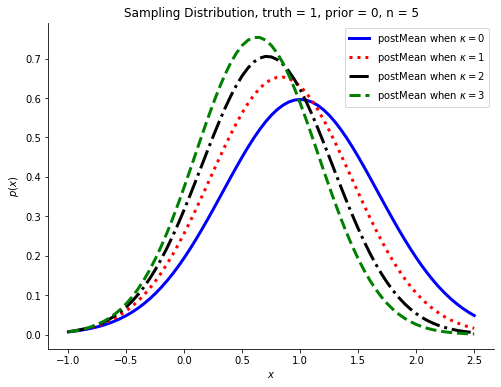

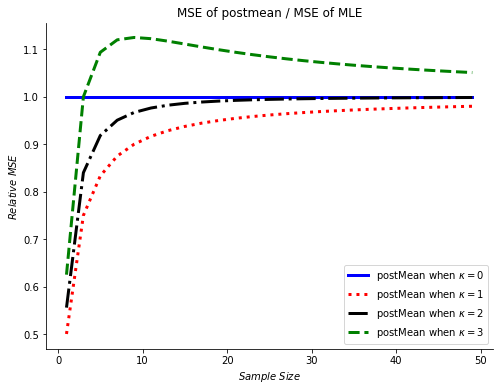

In [ ]:
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 6))
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 6))
plot_posterior_mean(colors=colors, styles=styles, fig=fig1, ax=ax1)
plot_relative_mean(colors=colors, styles=styles, fig=fig2, ax=ax2)
plt.show()

In [ ]:
from ipywidgets import interact, fixed


@interact(n=(2, 80, 1), colors=fixed(colors), styles=fixed(styles), k0=fixed(4))
def plot_posterior_mean_interactive(n=4, colors=colors, styles=styles, k0=4):
    k0s = jnp.arange(k0)
    thetaTrue = 1
    sigmaTrue = 1
    thetaPrior = 0
    xrange = jnp.arange(-1, 2.55, 0.05)
    names = []
    for ki in range(len(k0s)):
        k0 = k0s[ki]
        w = n / (n + k0)
        v = w**2 * sigmaTrue**2 / n
        thetaEst = w * thetaTrue + (1 - w) * thetaPrior
        names.append("postMean when $\kappa = {0:01d}$".format(k0s[ki]))
        plt.plot(xrange, gaussProb(xrange, thetaEst, jnp.sqrt(v)), color=colors[ki], linestyle=styles[ki], linewidth=3)
    plt.title("Sampling Distribution, truth = {}, prior = {}, n = {}".format(thetaTrue, thetaPrior, n))
    plt.xlabel("$x$")
    plt.ylabel("$p (x)$")
    plt.legend(names)
    plt.show()

interactive(children=(IntSlider(value=4, description='n', max=80, min=2), Output()), _dom_classes=('widget-int…